In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [10]:
img1 = cv2.imread("catto.jpg")
img2 = cv2.imread("trafficlight.jpg")

Topic: Colour Specs


In [11]:
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
hsv  = cv2.cvtColor(img1, cv2.COLOR_BGR2HSV)


In [ ]:
cv2_imshow(gray)

In [ ]:
cv2_imshow(hsv)

In [ ]:
#try using matplotlib, why is the output like this?

plt.imshow(gray)
plt.title("Grayscale")
plt.axis("off")


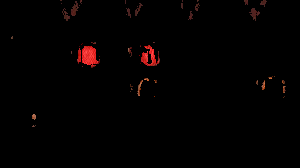

In [12]:
lower_red = np.array([0, 120, 70])
upper_red = np.array([10, 255, 255])

# Convert img2 to HSV color space to create a mask with matching dimensions
hsv_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2HSV)
mask = cv2.inRange(hsv_img2, lower_red, upper_red)

result = cv2.bitwise_and(img2, img2, mask=mask)

cv2_imshow(result)

In [ ]:
# Source - https://stackoverflow.com/a
# Posted by Ali Hashemian
# Retrieved 2026-01-17, License - CC BY-SA 4.0
# sample hsv color pallettes

color_dict_HSV = {'black': [[180, 255, 30], [0, 0, 0]],
              'white': [[180, 18, 255], [0, 0, 231]],
              'red1': [[180, 255, 255], [159, 50, 70]],
              'red2': [[9, 255, 255], [0, 50, 70]],
              'green': [[89, 255, 255], [36, 50, 70]],
              'blue': [[128, 255, 255], [90, 50, 70]],
              'yellow': [[35, 255, 255], [25, 50, 70]],
              'purple': [[158, 255, 255], [129, 50, 70]],
              'orange': [[24, 255, 255], [10, 50, 70]],
              'gray': [[180, 18, 230], [0, 0, 40]]}


Topic: Thresholding

In [13]:
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
#Simple binary threshold: 127 is used as threshold ("is this pixel white or black?") 255: white


In [ ]:
adaptive = cv2.adaptiveThreshold(
    gray,
    255,
    cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY,
    11,
    2
)
#adaptive thresholds can be calculated via mean or median or gaussian weighted average


Topic: Blurring and Filtering

In [ ]:
gaussian = cv2.GaussianBlur(img1, (11, 11), 0)
cv2_imshow(gaussian)
#try adding values of 31, 51!

In [ ]:
median = cv2.medianBlur(img1, 11)
cv2_imshow(median)

In [ ]:
bilateral = cv2.bilateralFilter(img1, 25, 150, 150)
cv2_imshow(bilateral)
#try with 9,75,75
#cv2.bilateralFilter(src, d, sigmaColor, sigmaSpace)

Topic: Morphological Transforms

In [64]:
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)


In [65]:
kernel = np.ones((7, 7), np.uint8)


In [66]:
eroded = cv2.erode(binary, kernel, iterations=1)


In [67]:
dilated = cv2.dilate(binary, kernel, iterations=1)


In [68]:
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

In [69]:
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)


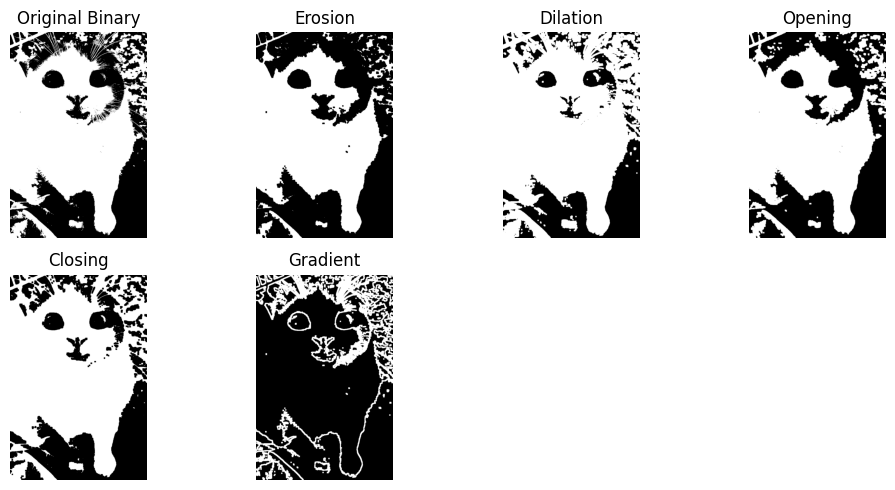

In [70]:
titles = [
    "Original Binary",
    "Erosion",
    "Dilation",
    "Opening",
    "Closing",
    "Gradient",
]

images = [
    binary,
    eroded,
    dilated,
    opening,
    closing,
    gradient
]

plt.figure(figsize=(10, 5))

for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()
